In [1]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns

from warnings import filterwarnings
filterwarnings(action='ignore')
import pickle

- loading dataset

In [2]:
winedf=pd.read_csv('WineQT.csv')
print(winedf.shape)
winedf.head()

(1143, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


- checking null values

In [3]:
winedf=winedf.drop('Id',axis=1)
cols=winedf.columns.tolist()
cols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [4]:
winedf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
nullVal=winedf.isnull().sum()
nullVal

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

- analyzing, finding correlation and visualizations 

In [6]:
winedf=winedf.sort_values(by='quality',ascending=True)
winedf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
922,7.6,1.580,0.00,2.1,0.137,5.0,9.0,0.99476,3.50,0.40,10.9,3
324,11.6,0.580,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3
1055,7.1,0.875,0.05,5.7,0.082,3.0,14.0,0.99808,3.40,0.52,10.2,3
368,10.4,0.610,0.49,2.1,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3
1046,7.3,0.980,0.05,2.1,0.061,20.0,49.0,0.99705,3.31,0.55,9.7,3
...,...,...,...,...,...,...,...,...,...,...,...,...
793,7.9,0.540,0.34,2.5,0.076,8.0,17.0,0.99235,3.20,0.72,13.1,8
340,9.4,0.300,0.56,2.8,0.080,6.0,17.0,0.99640,3.15,0.92,11.7,8
321,11.3,0.620,0.67,5.2,0.086,6.0,19.0,0.99880,3.22,0.69,13.4,8
1030,7.2,0.380,0.31,2.0,0.056,15.0,29.0,0.99472,3.23,0.76,11.3,8


In [7]:
winedf.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


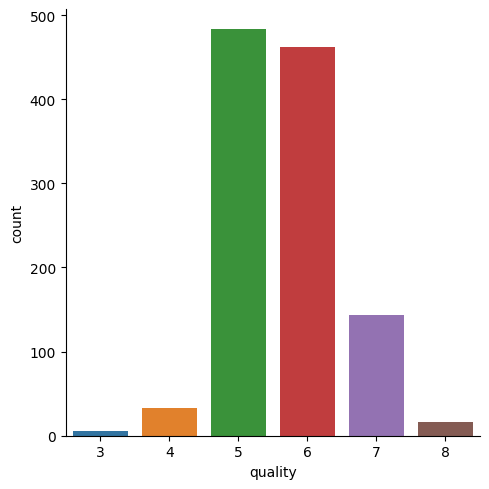

In [8]:
sns.catplot(x='quality',data=winedf,kind='count')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


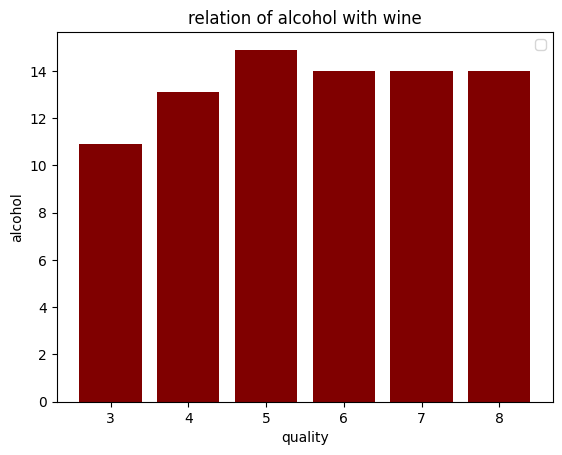

In [9]:
plt.bar(winedf['quality'],winedf['alcohol'],color='maroon')
plt.title('relation of alcohol with wine')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.legend()
plt.show()

<Axes: xlabel='quality', ylabel='citric acid'>

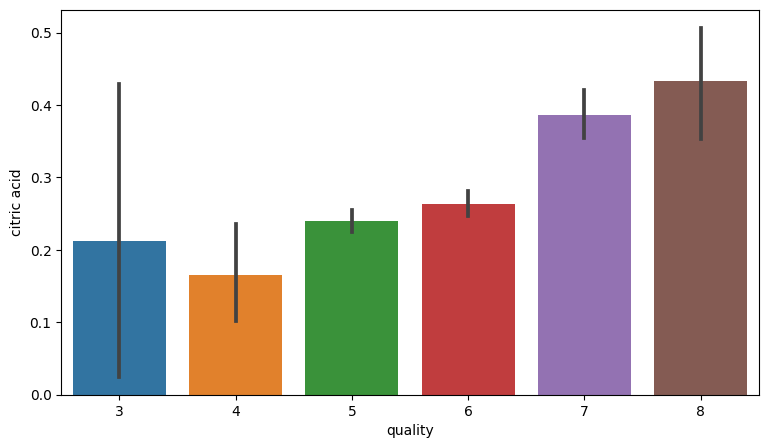

In [10]:
fig=plt.figure(figsize=(9,5))
sns.barplot(x = 'quality', y = 'citric acid', data = winedf)

<Axes: xlabel='quality', ylabel='residual sugar'>

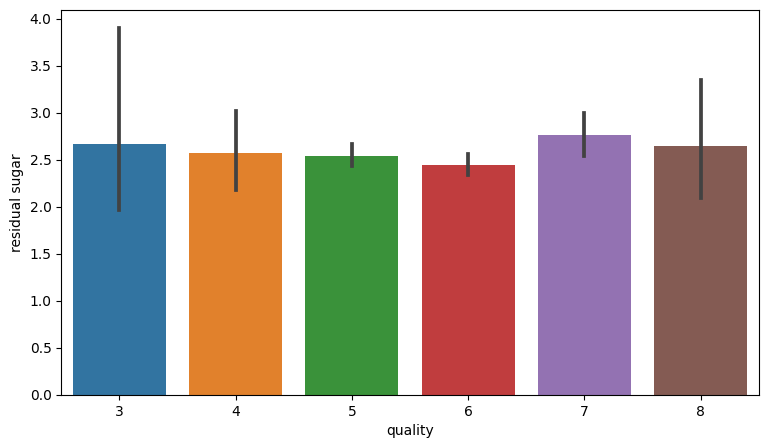

In [11]:
fig=plt.figure(figsize=(9,5))
sns.barplot(x = 'quality', y = 'residual sugar', data = winedf)

<Axes: xlabel='quality', ylabel='chlorides'>

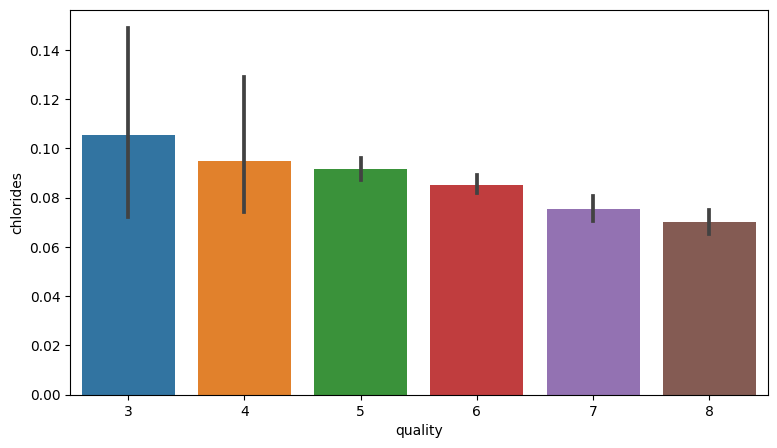

In [12]:
fig=plt.figure(figsize=(9,5))
sns.barplot(x = 'quality', y = 'chlorides', data = winedf)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

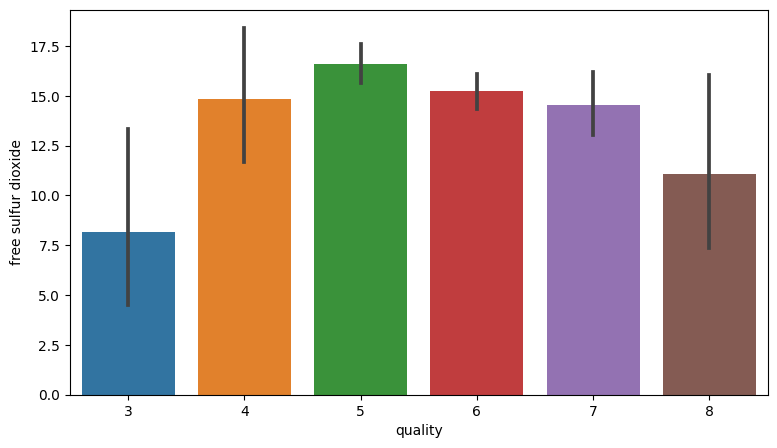

In [13]:
fig=plt.figure(figsize=(9,5))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = winedf)

<Axes: xlabel='quality', ylabel='sulphates'>

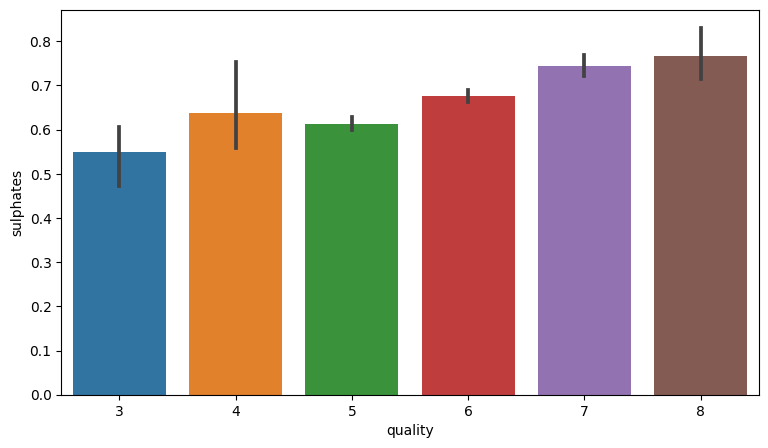

In [14]:
fig=plt.figure(figsize=(9,5))
sns.barplot(x = 'quality', y = 'sulphates', data = winedf)

In [15]:
corr = winedf.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710


<Axes: >

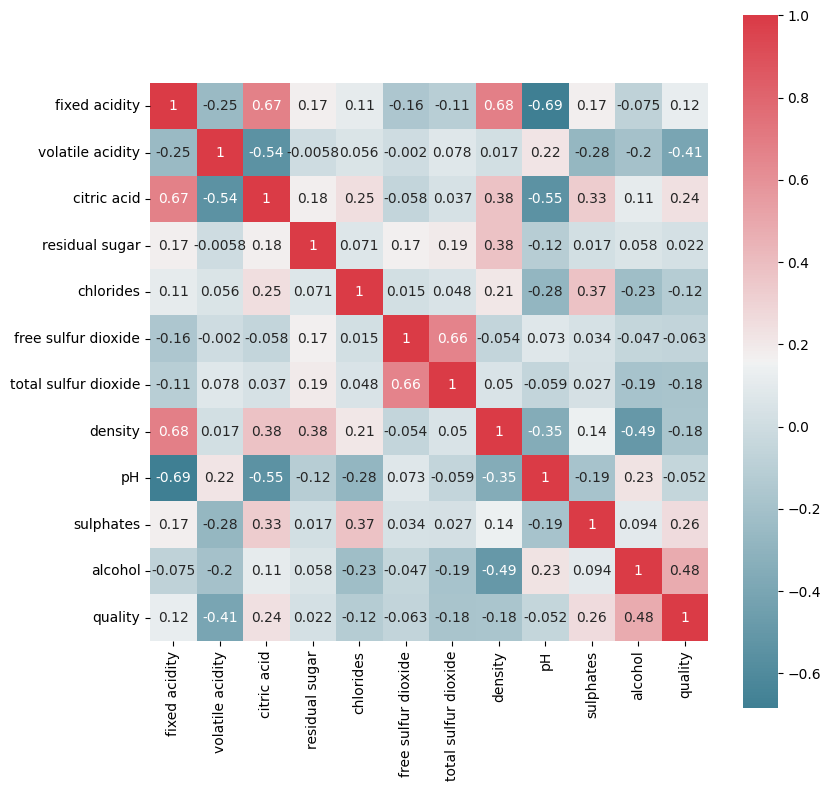

In [16]:
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True,annot=True, ax=ax)

In [17]:
winedf['quality'].dtype

dtype('int64')

In [18]:
threshold1=6
threshold2=5
winedf['quality']=winedf['quality'].apply(lambda x:'good' if x>threshold1 else ('avg' if x>threshold2 else 'bad'))
winedf['quality']=pd.Categorical(winedf['quality'],categories=['bad','avg','good'])

In [19]:

winedf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
922,7.6,1.580,0.00,2.1,0.137,5.0,9.0,0.99476,3.50,0.40,10.9,bad
324,11.6,0.580,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,bad
1055,7.1,0.875,0.05,5.7,0.082,3.0,14.0,0.99808,3.40,0.52,10.2,bad
368,10.4,0.610,0.49,2.1,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,bad
1046,7.3,0.980,0.05,2.1,0.061,20.0,49.0,0.99705,3.31,0.55,9.7,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
793,7.9,0.540,0.34,2.5,0.076,8.0,17.0,0.99235,3.20,0.72,13.1,good
340,9.4,0.300,0.56,2.8,0.080,6.0,17.0,0.99640,3.15,0.92,11.7,good
321,11.3,0.620,0.67,5.2,0.086,6.0,19.0,0.99880,3.22,0.69,13.4,good
1030,7.2,0.380,0.31,2.0,0.056,15.0,29.0,0.99472,3.23,0.76,11.3,good


In [20]:
winedf['quality'].value_counts()

bad     522
avg     462
good    159
Name: quality, dtype: int64

In [21]:
# for giving data to ml model for training label(o/p val) must be in binary format

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

winedf['quality'] = le.fit_transform(winedf['quality'])

# winedf['quality'].value_counts

In [22]:
winedf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
922,7.6,1.580,0.00,2.1,0.137,5.0,9.0,0.99476,3.50,0.40,10.9,1
324,11.6,0.580,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,1
1055,7.1,0.875,0.05,5.7,0.082,3.0,14.0,0.99808,3.40,0.52,10.2,1
368,10.4,0.610,0.49,2.1,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,1
1046,7.3,0.980,0.05,2.1,0.061,20.0,49.0,0.99705,3.31,0.55,9.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...
793,7.9,0.540,0.34,2.5,0.076,8.0,17.0,0.99235,3.20,0.72,13.1,2
340,9.4,0.300,0.56,2.8,0.080,6.0,17.0,0.99640,3.15,0.92,11.7,2
321,11.3,0.620,0.67,5.2,0.086,6.0,19.0,0.99880,3.22,0.69,13.4,2
1030,7.2,0.380,0.31,2.0,0.056,15.0,29.0,0.99472,3.23,0.76,11.3,2


In [23]:
# dividing the dataset into dependent and independent variables
X=winedf.drop('quality',axis=1)  # Features (input columns)
y=winedf['quality'] # Target (output column)

In [24]:
y

922     1
324     1
1055    1
368     1
1046    1
       ..
793     2
340     2
321     2
1030    2
1104    2
Name: quality, Length: 1143, dtype: int32

In [25]:
from sklearn.model_selection import train_test_split
# dividing the dataset in training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
# determining the shapes of training and testing sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(914, 11)
(914,)
(229, 11)
(229,)


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

# classification report
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.68      0.66        98
           1       0.74      0.72      0.73       101
           2       0.56      0.50      0.53        30

    accuracy                           0.68       229
   macro avg       0.65      0.64      0.64       229
weighted avg       0.68      0.68      0.68       229



In [27]:
# Create an instance of th e RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

In [28]:
# Fit the model to the training data
model.fit(X_train,y_train)

RandomForestClassifier()

In [29]:
# Predict the labels for the testing data
y_pred=model.predict(X_test)

In [30]:
# model evaluation
# accuracy score on test data
from sklearn.metrics import accuracy_score, classification_report

accuracy=accuracy_score(y_pred,y_test)
classification_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report)

Accuracy: 0.7074235807860262
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.68      0.68        98
           1       0.77      0.76      0.77       101
           2       0.58      0.60      0.59        30

    accuracy                           0.71       229
   macro avg       0.68      0.68      0.68       229
weighted avg       0.71      0.71      0.71       229



In [31]:
input=(7.4,0.29,0.3,1.7,0.07,17.0,25.0,0.99,3.24,0.7,11)
arr=np.asarray(input)
arr

input_reshape=arr.reshape(1,-1)
p=model.predict(input_reshape)
print(p)

[0]


In [32]:
print(p[0])
if p[0]==2:
    print("Good quality wine :)")
elif p[0]==1:
    print("Average quality wine :|")
else:
    print("Bad quality wine :(")

0
Bad quality wine :(
